In [35]:
import pandas as pd
df = pd.read_csv('../livecoding-data/marketing_campaign.csv', sep='\t')

In [36]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [38]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [39]:
df = df.drop(columns=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2'])

In [40]:
df.Response.value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [41]:
drop_list = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Complain', 'Response', 'ID', 'Recency']

In [42]:
df = df.drop(columns=drop_list)

In [45]:
dummies = pd.get_dummies(df[['Education', 'Marital_Status']])

In [46]:
df = pd.concat([df, dummies], axis=1)

In [48]:
df = df.drop(columns=['Education', 'Marital_Status'])

In [51]:
df.info() # Everything is numbers 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2240 non-null   int64  
 1   Income                   2216 non-null   float64
 2   Kidhome                  2240 non-null   int64  
 3   Teenhome                 2240 non-null   int64  
 4   MntWines                 2240 non-null   int64  
 5   MntFruits                2240 non-null   int64  
 6   MntMeatProducts          2240 non-null   int64  
 7   MntFishProducts          2240 non-null   int64  
 8   MntSweetProducts         2240 non-null   int64  
 9   MntGoldProds             2240 non-null   int64  
 10  NumDealsPurchases        2240 non-null   int64  
 11  NumWebPurchases          2240 non-null   int64  
 12  NumCatalogPurchases      2240 non-null   int64  
 13  NumStorePurchases        2240 non-null   int64  
 14  NumWebVisitsMonth       

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(df) # This fits the scaler to the data. 
scaled_matrix = scaler.transform(df) # Returns the transformed data based on the fit. 

scaled_matrix

array([[-0.98534473,  0.2340627 , -0.82521765, ..., -0.59109863,
        -0.18867619, -0.02989406],
       [-1.23573295, -0.23455948,  1.03255877, ..., -0.59109863,
        -0.18867619, -0.02989406],
       [-0.3176428 ,  0.76947764, -0.82521765, ...,  1.69176504,
        -0.18867619, -0.02989406],
       ...,
       [ 1.01776106,  0.18809052, -0.82521765, ..., -0.59109863,
        -0.18867619, -0.02989406],
       [-1.06880747,  0.67538765, -0.82521765, ...,  1.69176504,
        -0.18867619, -0.02989406],
       [-1.23573295,  0.02470453,  1.03255877, ..., -0.59109863,
        -0.18867619, -0.02989406]])

In [61]:
scaled_df = pd.DataFrame(scaled_matrix, columns=scaler.get_feature_names_out())

In [65]:
df.Marital_Status_Absurd.value_counts()

0    2238
1       2
Name: Marital_Status_Absurd, dtype: int64

In [64]:
scaled_df.Marital_Status_Absurd.value_counts()

-0.029894     2238
 33.451457       2
Name: Marital_Status_Absurd, dtype: int64

In [66]:
scaler = MinMaxScaler()
scaler.fit(df) # This fits the scaler to the data. 
scaled_matrix = scaler.transform(df) # Returns the transformed data based on the fit. 

scaled_matrix
scaled_df = pd.DataFrame(scaled_matrix, columns=scaler.get_feature_names_out())

In [67]:
scaled_df

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.621359,0.084832,0.0,0.0,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.592233,0.067095,0.5,0.5,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.699029,0.105097,0.0,0.0,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.883495,0.037471,0.5,0.0,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.854369,0.085065,0.5,0.0,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.718447,0.089472,0.0,0.5,0.474883,0.216080,0.105507,0.162162,0.448669,0.682320,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,0.514563,0.093669,1.0,0.5,0.271936,0.000000,0.017391,0.000000,0.000000,0.022099,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,0.854369,0.083092,0.0,0.0,0.608171,0.241206,0.125797,0.123552,0.045627,0.066298,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,0.611650,0.101536,0.0,0.5,0.286671,0.150754,0.124058,0.308880,0.114068,0.168508,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
df.dropna(inplace=True)

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init='auto')

kmeans.fit(df)

KMeans(n_clusters=4, n_init='auto')

In [73]:
kmeans.labels_

(2216,)

In [77]:
all(kmeans.predict(df) == kmeans.labels_) # Proves they are the same

True

In [80]:
import numpy as np
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([687, 785,   1, 743]))

In [88]:
df[kmeans.labels_ == 2].iloc[0]

Year_Birth                   1977.0
Income                     666666.0
Kidhome                         1.0
Teenhome                        0.0
MntWines                        9.0
MntFruits                      14.0
MntMeatProducts                18.0
MntFishProducts                 8.0
MntSweetProducts                1.0
MntGoldProds                   12.0
NumDealsPurchases               4.0
NumWebPurchases                 3.0
NumCatalogPurchases             1.0
NumStorePurchases               3.0
NumWebVisitsMonth               6.0
Education_2n Cycle              0.0
Education_Basic                 0.0
Education_Graduation            1.0
Education_Master                0.0
Education_PhD                   0.0
Marital_Status_Absurd           0.0
Marital_Status_Alone            0.0
Marital_Status_Divorced         0.0
Marital_Status_Married          0.0
Marital_Status_Single           0.0
Marital_Status_Together         1.0
Marital_Status_Widow            0.0
Marital_Status_YOLO         

In [89]:
a = df[kmeans.labels_ == 0]
b = df[kmeans.labels_ == 1]
c = df[kmeans.labels_ == 3]

In [95]:
a.describe().T - df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,-1529.0,-1.386627,0.856429,6.0,-2.0,-2.0,-1.00,-1.0
Income,-1529.0,24720.592897,-13685.402934,62983.0,34454.0,23933.5,12955.00,-504269.0
Kidhome,-1529.0,-0.355906,-0.251353,0.0,0.0,0.0,-1.00,0.0
Teenhome,-1529.0,-0.154615,-0.037007,0.0,0.0,0.0,0.00,0.0
MntWines,-1529.0,310.872003,-13.697642,1.0,348.0,388.5,324.00,0.0
MntFruits,-1529.0,30.495481,8.506782,0.0,19.0,32.0,51.00,-2.0
MntMeatProducts,-1529.0,230.661994,27.588781,1.0,181.5,295.0,317.25,0.0
MntFishProducts,-1529.0,45.232816,10.922345,0.0,26.0,53.0,77.00,-1.0
MntSweetProducts,-1529.0,33.171992,10.276706,0.0,20.0,34.0,59.00,0.0
MntGoldProds,-1529.0,26.209420,7.786289,0.0,18.0,25.5,44.00,-72.0


In [96]:
b.describe().T - df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,-1431.0,-2.849696,-1.070861,0.0,-2.0,-4.0,-3.00,-4.0
Income,-1431.0,172.767754,-18063.692640,38712.0,10799.0,1031.5,-10010.00,-602076.0
Kidhome,-1431.0,-0.036691,-0.000968,0.0,0.0,0.0,0.00,0.0
Teenhome,-1431.0,0.317515,-0.059220,0.0,1.0,1.0,0.00,0.0
MntWines,-1431.0,-11.883963,-69.740768,4.0,57.0,40.5,-81.00,-34.0
MntFruits,-1431.0,-7.391716,-7.579888,0.0,-1.0,-2.0,-13.00,0.0
MntMeatProducts,-1431.0,-67.806130,-115.662791,1.0,11.0,0.0,-99.25,-907.0
MntFishProducts,-1431.0,-12.500056,-14.184472,0.0,-1.0,-4.0,-20.00,0.0
MntSweetProducts,-1431.0,-9.132066,-11.684187,0.0,-1.0,-2.0,-13.00,-70.0
MntGoldProds,-1431.0,1.925193,-2.472764,0.0,2.0,3.5,8.00,-74.0


In [97]:
c.describe().T - df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,-1473.0,4.281891,-0.955320,7.0,8.0,4.0,4.00,0.0
Income,-1473.0,-23866.875849,-16733.004476,0.0,-12611.5,-21358.5,-33120.00,-626322.0
Kidhome,-1473.0,0.367096,-0.059847,0.0,1.0,1.0,0.00,0.0
Teenhome,-1473.0,-0.191822,-0.062813,0.0,0.0,0.0,0.00,0.0
MntWines,-1473.0,-274.487300,-292.546997,0.0,-18.0,-160.5,-471.50,-1209.0
MntFruits,-1473.0,-20.370852,-27.993873,0.0,-1.0,-5.0,-27.00,-48.0
MntMeatProducts,-1473.0,-141.437392,-154.579460,0.0,-9.0,-55.0,-208.25,0.0
MntFishProducts,-1473.0,-28.577070,-36.209050,0.0,-1.0,-8.0,-39.50,-51.0
MntSweetProducts,-1473.0,-20.988504,-29.391621,0.0,0.0,-5.0,-26.00,-105.0
MntGoldProds,-1473.0,-26.225010,-23.041342,0.0,-5.0,-14.5,-36.00,0.0


In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.0,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
MntWines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
MntGoldProds,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0


In [99]:
kmeans.inertia_

183251028212.57562

In [100]:
df_scaled = MinMaxScaler().fit_transform(df)

In [107]:
clusters = range(2,13)
wcss = []

for n in clusters:
    km = KMeans(n_clusters=n, n_init='auto')
    km.fit(df_scaled)
    wcss.append(km.inertia_)
wcss

[3395.58724193609,
 3021.1561715632843,
 2689.0501714040847,
 2360.9306538523556,
 2270.6695316035425,
 2103.619254776243,
 1910.4943534850036,
 1701.5749183260723,
 1695.3064973116889,
 1577.5575452016164,
 1531.587043211499]

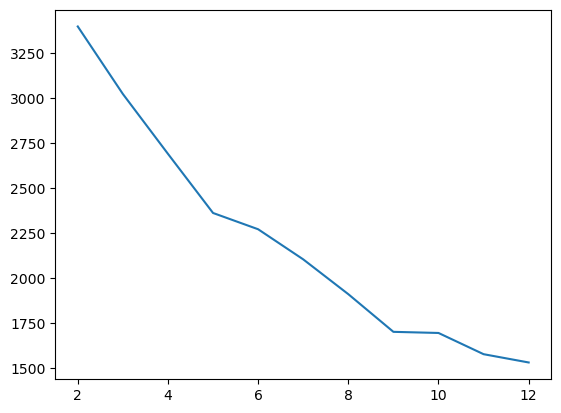

In [108]:
import matplotlib.pyplot as plt

plt.plot(clusters, wcss);

In [109]:
km = KMeans(6, n_init='auto')

In [110]:
km.fit(df_scaled)

KMeans(n_clusters=6, n_init='auto')

In [112]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([259, 365, 429, 402, 290, 471]))

In [114]:
a = df[km.labels_ == 0]
b = df[km.labels_ == 1]
c = df[km.labels_ == 2]
d = df[km.labels_ == 3]
e = df[km.labels_ == 4]
f = df[km.labels_ == 5]

In [115]:
a.describe().T - df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,-1957.0,-1.279857,2.110782,0.0,-1.0,-2.0,0.00,-1.0
Income,-1957.0,-1497.664481,-4308.155119,5414.0,557.0,-2433.5,-2765.00,-552932.0
Kidhome,-1957.0,-0.020938,-0.011837,0.0,0.0,0.0,0.00,0.0
Teenhome,-1957.0,0.027403,0.021199,0.0,0.0,0.0,0.00,0.0
MntWines,-1957.0,23.333104,27.714762,0.0,-4.5,-16.5,89.50,-31.0
MntFruits,-1957.0,-3.830950,-4.343187,0.0,-1.0,-1.0,-5.50,-5.0
MntMeatProducts,-1957.0,-22.818332,-21.850780,0.0,-4.0,-18.0,-48.75,-751.0
MntFishProducts,-1957.0,-6.556554,-8.185830,0.0,0.0,-1.0,-11.00,0.0
MntSweetProducts,-1957.0,-1.650502,0.997706,0.0,0.0,-2.0,-0.50,0.0
MntGoldProds,-1957.0,-6.444017,-4.453758,0.0,-1.0,-1.5,-14.00,-30.0


In [116]:
b.describe().T - df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,-1851.0,-1.872452,-0.591270,50.0,-2.0,-2.0,-2.00,-4.0
Income,-1851.0,670.282893,-5015.288632,4830.0,2457.0,-438.5,-1796.00,-508933.0
Kidhome,-1851.0,0.015747,0.009299,0.0,0.0,0.0,0.00,0.0
Teenhome,-1851.0,0.028831,0.002592,0.0,0.0,1.0,0.00,0.0
MntWines,-1851.0,27.889215,18.792140,2.0,13.0,2.5,39.00,-7.0
MntFruits,-1851.0,-4.980704,-5.213878,0.0,-1.0,-2.0,-7.00,-5.0
MntMeatProducts,-1851.0,-4.075391,-1.812675,1.0,3.0,-5.0,-28.25,-800.0
MntFishProducts,-1851.0,-6.144485,-3.961756,0.0,-1.0,-4.0,-14.00,-1.0
MntSweetProducts,-1851.0,-6.220662,-6.770996,0.0,0.0,-3.0,-11.00,-83.0
MntGoldProds,-1851.0,-3.776212,-5.102239,0.0,-1.0,-4.5,0.00,-59.0


In [117]:
c.describe().T - df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,-1787.0,1.459323,-0.749095,51.0,2.0,2.0,1.00,-4.0
Income,-1787.0,-1446.992613,-4385.950427,717.0,-923.0,-644.5,-1077.00,-572024.0
Kidhome,-1787.0,0.015089,0.006656,0.0,0.0,0.0,0.00,0.0
Teenhome,-1787.0,-0.004250,0.005350,0.0,0.0,0.0,0.00,0.0
MntWines,-1787.0,-32.704660,-39.875255,0.0,-1.0,4.5,-67.00,-44.0
MntFruits,-1787.0,2.865398,2.761873,0.0,0.0,1.0,3.00,-6.0
MntMeatProducts,-1787.0,4.232500,1.624655,1.0,0.0,1.0,17.75,0.0
MntFishProducts,-1787.0,3.900826,2.533899,0.0,0.0,3.0,8.00,-5.0
MntSweetProducts,-1787.0,4.365059,3.849392,0.0,1.0,4.0,5.00,-65.0
MntGoldProds,-1787.0,6.018430,4.783620,0.0,0.0,3.5,10.00,0.0


In [118]:
d.describe().T - df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,-1814.0,1.015424,-0.246797,52.0,2.00,0.0,1.00,-1.0
Income,-1814.0,368.318298,-3171.974996,0.0,-818.00,991.0,1774.75,-512742.0
Kidhome,-1814.0,-0.033827,-0.020109,0.0,0.00,0.0,0.00,0.0
Teenhome,-1814.0,-0.045216,-0.020757,0.0,0.00,0.0,0.00,0.0
MntWines,-1814.0,-26.566731,-36.902734,0.0,-1.00,7.0,-43.00,-169.0
MntFruits,-1814.0,6.845446,6.903408,0.0,1.00,3.0,11.00,0.0
MntMeatProducts,-1814.0,16.387146,0.581281,1.0,0.25,20.5,37.75,-741.0
MntFishProducts,-1814.0,6.305151,4.880744,0.0,0.00,3.0,9.50,-9.0
MntSweetProducts,-1814.0,4.478582,2.528798,0.0,1.00,4.0,10.00,-64.0
MntGoldProds,-1814.0,6.870568,2.875719,0.0,2.25,5.5,18.75,-76.0


In [119]:
e.describe().T - df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,-1926.0,0.831327,-0.337036,48.0,3.00,1.0,1.00,0.0
Income,-1926.0,102.831405,-1623.983397,2293.0,260.25,1963.5,-76.25,-505863.0
Kidhome,-1926.0,-0.003856,0.000246,0.0,0.00,0.0,0.00,0.0
Teenhome,-1926.0,-0.015760,-0.009990,0.0,0.00,0.0,0.00,0.0
MntWines,-1926.0,22.139428,48.365584,0.0,-4.75,-16.0,46.75,0.0
MntFruits,-1926.0,-3.311219,-5.624462,0.0,-1.00,0.0,-3.00,-2.0
MntMeatProducts,-1926.0,-9.295939,14.921457,1.0,-4.00,-10.5,-33.25,-103.0
MntFishProducts,-1926.0,-6.465222,-8.450925,0.0,-1.00,-2.0,-11.25,-51.0
MntSweetProducts,-1926.0,-4.280605,-4.986477,0.0,0.00,-1.0,-3.00,-77.0
MntGoldProds,-1926.0,-8.941115,-5.557194,0.0,-2.00,-7.5,-18.00,-92.0


In [120]:
f.describe().T - df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,-1745.0,-0.552881,0.023511,6.0,-0.5,-1.0,1.00,-2.0
Income,-1745.0,1244.408943,10605.260269,3918.0,-720.5,821.5,916.50,0.0
Kidhome,-1745.0,0.016812,0.010715,0.0,0.0,0.0,0.00,0.0
Teenhome,-1745.0,0.014755,0.004625,0.0,0.0,0.0,0.00,0.0
MntWines,-1745.0,4.388224,-1.107300,0.0,-4.0,22.5,9.00,-1.0
MntFruits,-1745.0,-0.447342,-0.583218,0.0,-1.0,1.0,-2.00,-14.0
MntMeatProducts,-1745.0,3.587925,1.172249,1.0,0.0,0.0,14.75,0.0
MntFishProducts,-1745.0,3.413320,4.075520,0.0,0.0,0.0,8.50,-1.0
MntSweetProducts,-1745.0,0.565599,0.512770,0.0,0.0,1.0,-2.00,-66.0
MntGoldProds,-1745.0,0.629227,1.001522,0.0,-1.0,0.5,1.50,-80.0
